In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from matplotlib.pyplot import cm
from scipy import stats

In [2]:
features = pd.read_csv("/home/camar_temp/git-repos/buckets/bkt_prd_dsv_brain_therapy_raw/Features/Focused_Attention/features_FA_ANOVA_context_level.csv")

In [3]:
features.head()

,Unnamed: 0,Participant,type,context,Datetime,ecg_heart_rate,ecg_hrv_std,skin_temperature,eda_mean,eda_no_of_peaks,eda_lf,eda_hf,eda_lf_hf_ratio,context_order,type_index,Difficulty,Perceptibility
0,0,1,2D,LL,2019-07-10 15:27:32,63.845537,80.797150,12.967358,4.025697,19,0.005602,0.003178,1.763087,1,0,0,0
1,1,1,2D,HH,2019-07-10 15:29:42,64.851440,78.254887,12.963048,2.845820,30,0.002634,0.001687,1.561080,2,0,1,1
2,2,1,2D,LH,2019-07-10 15:31:52,66.522944,94.265195,12.966694,3.310807,11,0.010295,0.005653,1.820969,3,0,0,1
3,3,1,2D,HL,2019-07-10 15:34:02,67.293510,95.744866,12.964674,3.256573,18,0.001840,0.000855,2.152029,4,0,1,0
4,4,1,3D,LH,2019-07-10 15:44:30,66.291683,69.593883,12.958660,6.262840,15,0.003172,0.000844,3.757924,1,1,0,1


In [4]:
columns = features.columns
features = features[columns[1:]]

In [5]:
features.set_index(["Participant","type","context","Datetime"], inplace = True)
features.head()

ecg_heart_rate  ecg_hrv_std  \
Participant type context Datetime                                           
1           2D   LL      2019-07-10 15:27:32       63.845537    80.797150   
                 HH      2019-07-10 15:29:42       64.851440    78.254887   
                 LH      2019-07-10 15:31:52       66.522944    94.265195   
                 HL      2019-07-10 15:34:02       67.293510    95.744866   
            3D   LH      2019-07-10 15:44:30       66.291683    69.593883   

                                              skin_temperature  eda_mean  \
Participant type context Datetime                                          
1           2D   LL      2019-07-10 15:27:32         12.967358  4.025697   
                 HH      2019-07-10 15:29:42         12.963048  2.845820   
                 LH      2019-07-10 15:31:52         12.966694  3.310807   
                 HL      2019-07-10 15:34:02         12.964674  3.256573   
            3D   LH      2019-07-10 15:44:30         12.958660  6.262840   

                                              eda_no_of_peaks    eda_lf  \
Participant type context Datetime                                         
1           2D   LL      2019-07-10 15:27:32               19  0.005602   
                 HH      2019-07-10 15:29:42               30  0.002634   
                 LH      2019-07-10 15:31:52               11  0.010295   
                 HL      2019-07-10 15:34:02               18  0.001840   
            3D   LH      2019-07-10 15:44:30               15  0.003172   

                                                eda_hf  eda_lf_hf_ratio  \
Participant type context Datetime                                         
1           2D   LL      2019-07-10 15:27:32  0.003178         1.763087   
                 HH      2019-07-10 15:29:42  0.001687         1.561080   
                 LH      2019-07-10 15:31:52  0.005653         1.820969   
                 HL      2019-07-10 15:34:02  0.000855         2.152029   
            3D   LH      2019-07-10 15:44:30  0.000844         3.757924   

                                              context_order  type_index  \
Participant type context Datetime                                         
1           2D   LL      2019-07-10 15:27:32              1           0   
                 HH      2019-07-10 15:29:42              2           0   
                 LH      2019-07-10 15:31:52              3           0   
                 HL      2019-07-10 15:34:02              4           0   
            3D   LH      2019-07-10 15:44:30              1           1   

                                              Difficulty  Perceptibility  
Participant type context Datetime                                         
1           2D   LL      2019-07-10 15:27:32           0               0  
                 HH      2019-07-10 15:29:42           1               1  
                 LH      2019-07-10 15:31:52           0               1  
                 HL      2019-07-10 15:34:02           1               0  
            3D   LH      2019-07-10 15:44:30           0               1

In [6]:
sensor_features = features.columns[:-4]
# sensor_features = [x for x in sensor_features if x not in ['skin_temperature','eda_mean']]
sensor_features

Index(['ecg_heart_rate', 'ecg_hrv_std', 'skin_temperature', 'eda_mean',
       'eda_no_of_peaks', 'eda_lf', 'eda_hf', 'eda_lf_hf_ratio'],
      dtype='object')

/home/camar_temp/.conda/envs/btsrd/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/camar_temp/.conda/envs/btsrd/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/camar_temp/.conda/envs/btsrd/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log


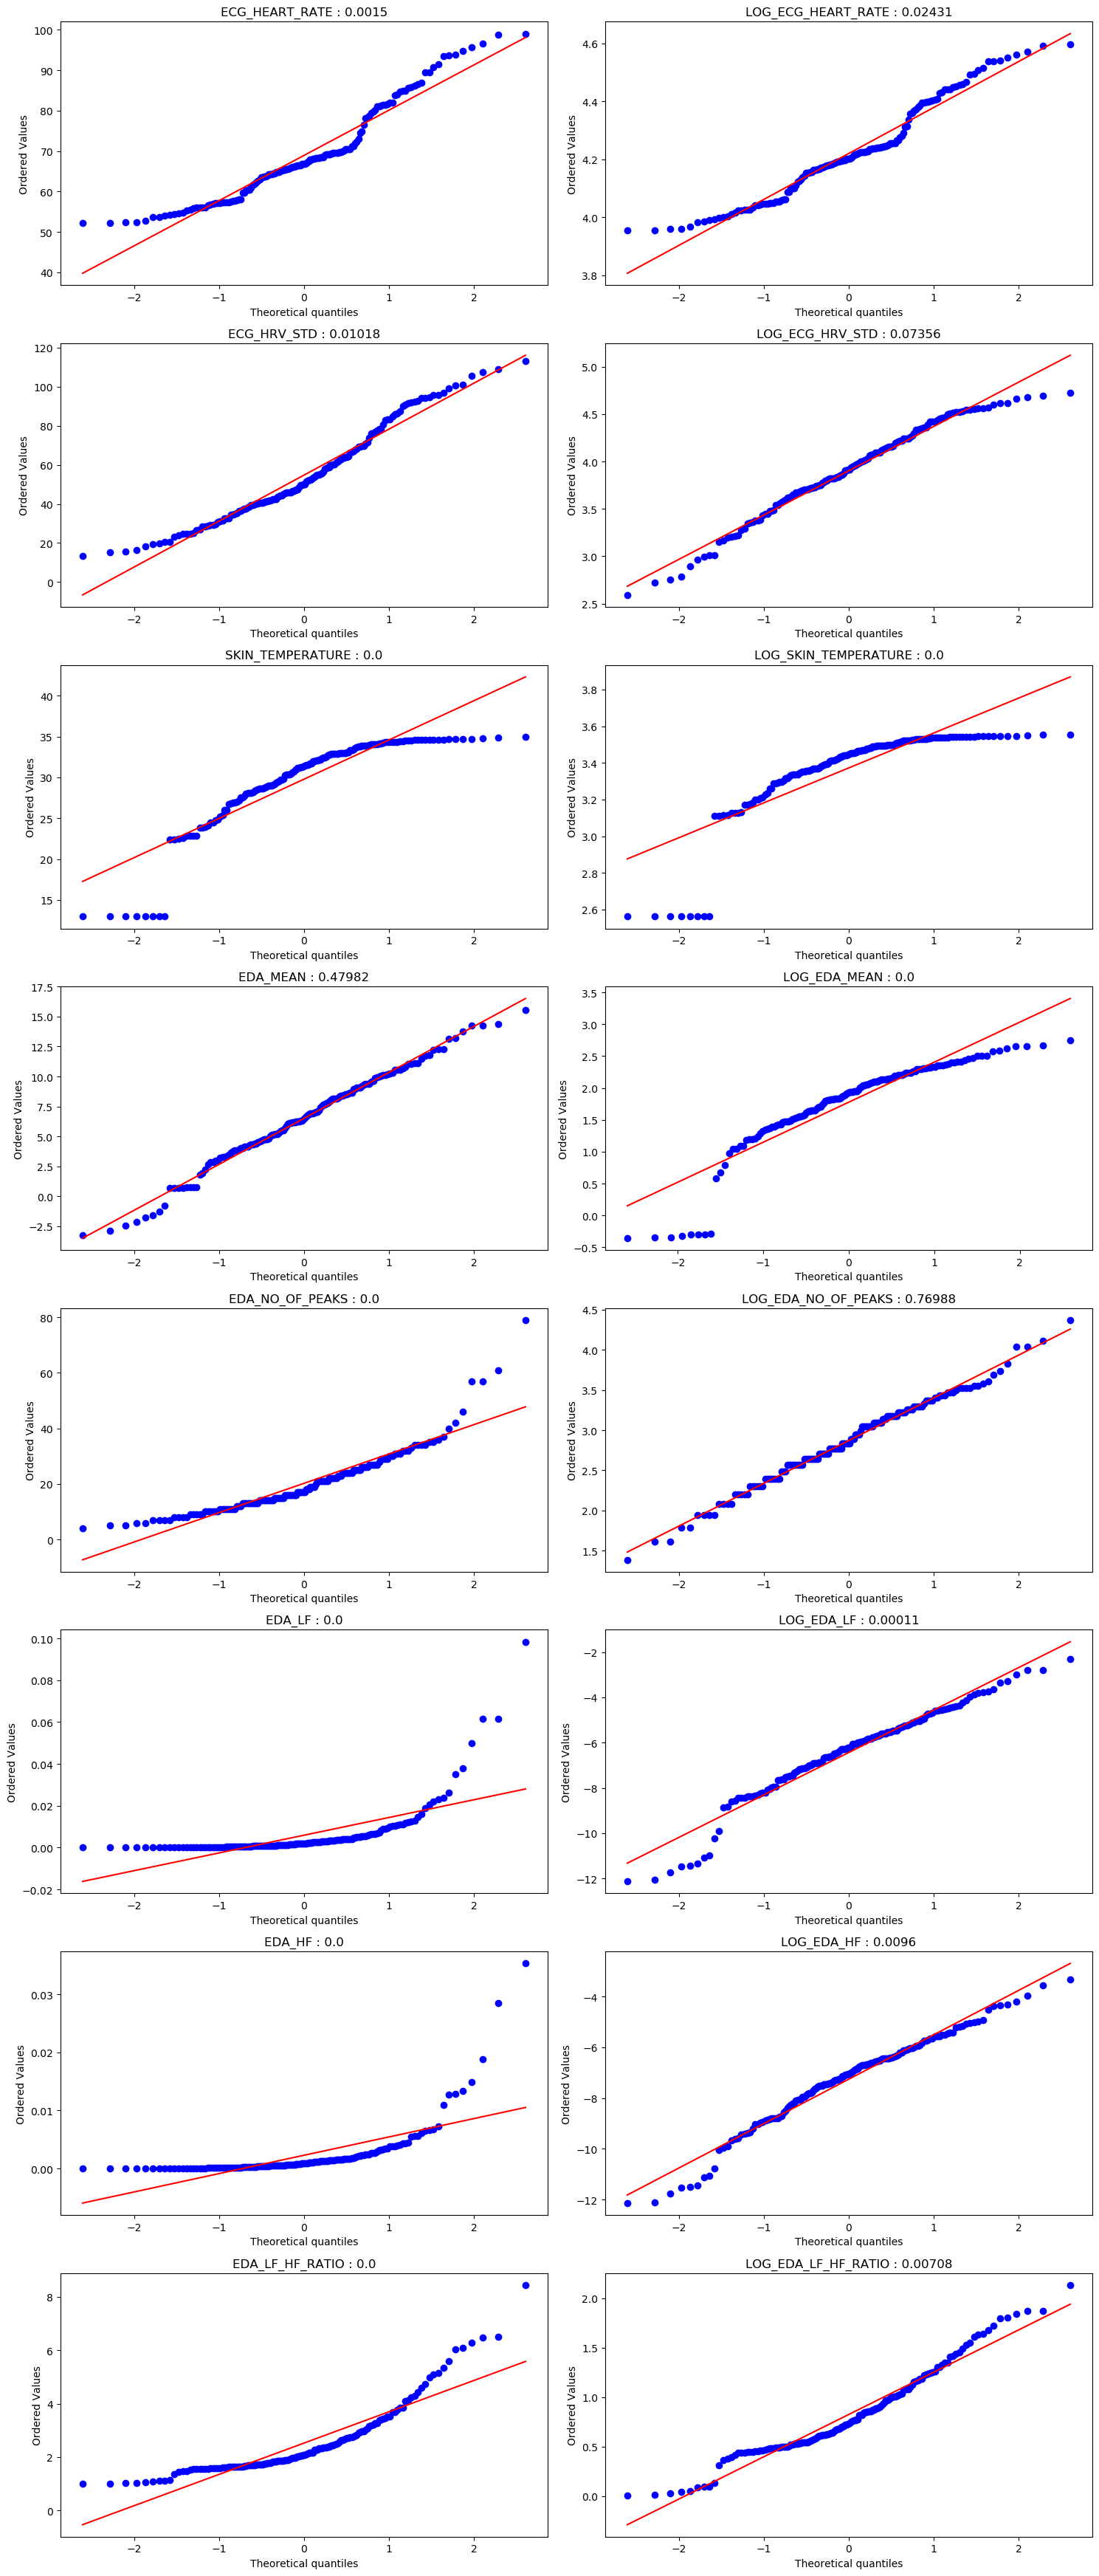

In [7]:

fig, axes = plt.subplots(8,2, figsize = (15,35), dpi = 100)
ax = axes.flatten()
i = 0
for sensor_feature in sensor_features:
    data = features[[sensor_feature]]
    ss = stats.probplot(data[sensor_feature].values, dist = "norm",  plot = ax[i])
    k2, p = stats.normaltest(data[sensor_feature].values)
    ax[i].set_title("{} : {}".format(sensor_feature.upper(),np.round(p,5)))
    
    data["log"] = np.log(data[sensor_feature].values)
    data.dropna(inplace = True)
    ss = stats.probplot(data["log"].values, dist = "norm", plot = ax[i+1])
    k2, p = stats.normaltest(data["log"].values)
    ax[i+1].set_title("LOG_{} : {}".format(sensor_feature.upper(), np.round(p,5)))
    i+=2
plt.tight_layout()
plt.show()
#     plt.plot(ss)